In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
import pandas as pd

# Load the dataset (adjust the path to your file)
file_path = '/content/flipkart dataset.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert the 'Rate' column to numeric, invalid parsing will be set as NaN
data['Rate_clean'] = pd.to_numeric(data['Rate'], errors='coerce')

# Drop rows where 'Rate_clean' is NaN (i.e., non-numeric entries)
data_cleaned = data.dropna(subset=['Rate_clean'])

# Ensure the rates are valid (between 1 and 5)
data_cleaned = data_cleaned[data_cleaned['Rate_clean'].between(1, 5)]

# Check the number of samples and the unique values (classes)
num_samples_cleaned = data_cleaned.shape[0]
class_names_cleaned = data_cleaned['Rate_clean'].unique()

print(f"Number of samples: {num_samples_cleaned}")
print(f"Unique classes (ratings): {class_names_cleaned}")


<ipython-input-7-b05b5a32f00e>:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding='ISO-8859-1')


Number of samples: 363239
Unique classes (ratings): [5. 4. 3. 1. 2.]


In [ ]:
dataset.sample(10)

NameError: name 'dataset' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset (adjust the path to your file)
file_path = '/content/flipkart dataset.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert the 'Rate' column to numeric, invalid parsing will be set as NaN
data['Rate_clean'] = pd.to_numeric(data['Rate'], errors='coerce')

# Drop rows where 'Rate_clean' is NaN (i.e., non-numeric entries)
data_cleaned = data.dropna(subset=['Rate_clean'])

# Ensure the rates are valid (between 1 and 5)
data_cleaned = data_cleaned[data_cleaned['Rate_clean'].between(1, 5)]

# Number of samples (rows) and features (columns)
num_samples = data_cleaned.shape[0]
num_features = data_cleaned.shape[1]

# Assuming 'Rate_clean' column is our class labels
class_names = data_cleaned['Rate_clean'].unique()

print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")
print(f"Names of classes: {class_names}")



<ipython-input-33-0d712984cc6f>:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding='ISO-8859-1')


Number of samples: 363239
Number of features: 6
Names of classes: [5. 4. 3. 1. 2.]


In [ ]:
data_cleaned['Price_clean'] = pd.to_numeric(data_cleaned['Price'].replace('[^0-9]', '', regex=True), errors='coerce')

# Drop rows with missing 'Price_clean' values
data_cleaned = data_cleaned.dropna(subset=['Price_clean'])

# Splitting the data into features (X) and target (y)
X = data_cleaned[['Price_clean']]  # Using Price as feature
y = data_cleaned['Rate_clean']     # Rating as the target variable

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model: Random Forest Classifier
model = RandomForestClassifier()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the model: {accuracy * 100:.2f}%")


Accuracy of the model: 56.94%


In [ ]:
#import necessary modules
import numpy as np
import pandas as pd
# file location on web
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
# Assign colum names to the dataset
names = ['Id','RI', 'Na','Mg', 'Al','Si','K','Ca','Ba','Fe','class']
# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)
(sampleNum,featureNum)=dataset.shape
print('Number of samples',sampleNum)
print('Number of features',featureNum-1)
classNum = ((dataset.iloc[:,-1].unique()))
print('Names of classes',classNum)

Number of samples 214
Number of features 10
Names of classes [1 2 3 5 6 7]


In [ ]:
# vizualize 10 random samples
dataset.sample(10)

Id       RI     Na    Mg    Al     Si     K     Ca   Ba    Fe  class
84    85  1.51409  14.25  3.09  2.08  72.28  1.10   7.08  0.0  0.00      2
115  116  1.51846  13.41  3.89  1.33  72.38  0.51   8.28  0.0  0.00      2
83    84  1.51594  13.09  3.52  1.55  72.87  0.68   8.05  0.0  0.09      2
112  113  1.52777  12.64  0.00  0.67  72.02  0.06  14.40  0.0  0.00      2
146  147  1.51769  13.65  3.66  1.11  72.77  0.11   8.60  0.0  0.00      3
79    80  1.51590  12.82  3.52  1.90  72.86  0.69   7.97  0.0  0.00      2
65    66  1.52099  13.69  3.59  1.12  71.96  0.09   9.40  0.0  0.00      1
116  117  1.51829  13.24  3.90  1.41  72.33  0.55   8.31  0.0  0.10      2
150  151  1.51665  13.14  3.45  1.76  72.48  0.60   8.38  0.0  0.17      3
92    93  1.51588  13.12  3.41  1.58  73.26  0.07   8.39  0.0  0.19      2

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(X.shape,y.shape)

(214, 10) (214,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Create an instance of Logistic Regression Classifier and fit the data.
model = logreg.fit(X_train,y_train)
print("Accuracy %.2f" % (model.score(X_test, y_test)*100),"%")

Accuracy 93.02 %


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.29874047 0.22266626 0.15154207 0.11566905 0.08164149 0.05026021
 0.03851645 0.0339237  0.00685775]


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Create an instance of Logistic Regression Classifier and fit the data.
model = logreg.fit(X_train_pca,y_train)
print("Accuracy %.2f" % (model.score(X_test_pca, y_test)*100),"%")

Accuracy 93.02 %


In [ ]:
#pda
#import necessary modules
import numpy as np
import pandas as pd
# file location on web
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
# Assign colum names to the dataset
names = ['Id','RI', 'Na','Mg', 'Al','Si','K','Ca','Ba','Fe','class']
# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)
(sampleNum,featureNum)=dataset.shape
print('Number of samples',sampleNum)
print('Number of features',featureNum-1)
classNum = ((dataset.iloc[:,-1].unique()))
print('Names of classes',classNum)

Number of samples 214
Number of features 10
Names of classes [1 2 3 5 6 7]


In [ ]:
# vizualize 10 random samples
dataset.sample(10)

Id       RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  class
173  174  1.52043  13.38  0.00  1.40  72.25  0.33  12.50  0.00  0.00      5
77    78  1.51627  13.00  3.58  1.54  72.83  0.61   8.04  0.00  0.00      2
64    65  1.52172  13.48  3.74  0.90  72.01  0.18   9.61  0.00  0.07      1
91    92  1.51605  12.90  3.44  1.45  73.06  0.44   8.27  0.00  0.00      2
9     10  1.51755  13.00  3.60  1.36  72.99  0.57   8.40  0.00  0.11      1
213  214  1.51711  14.23  0.00  2.08  73.36  0.00   8.62  1.67  0.00      7
211  212  1.52065  14.36  0.00  2.02  73.42  0.00   8.44  1.64  0.00      7
167  168  1.51969  12.64  0.00  1.65  73.75  0.38  11.53  0.00  0.00      5
124  125  1.52177  13.20  3.68  1.15  72.75  0.54   8.52  0.00  0.00      2
128  129  1.52068  13.55  2.09  1.67  72.18  0.53   9.57  0.27  0.17      2

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(X.shape,y.shape)

(214, 10) (214,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Create an instance of Logistic Regression Classifier and fit the data.
model = logreg.fit(X_train,y_train)
print("Accuracy %.2f" % (model.score(X_test, y_test)*100),"%")

Accuracy 93.85 %


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Create an LDA that will reduce the data down to 1 feature
lda = LinearDiscriminantAnalysis(n_components=4)
# run an LDA and use it to transform the features
X_lda = lda.fit(X,y).transform(X)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_lda, X_test_lda, y_train_lda, y_test_lda =train_test_split(X_lda, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
# Create an instance of Logistic Regression Classifier and fit the data.
model = logreg1.fit(X_train_lda,y_train_lda)
print("Accuracy %.2f" % (model.score(X_test_lda, y_test_lda)*100),"%")


Accuracy 96.92 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
# Create an instance of Logistic Regression Classifier and fit the data.
model = logreg1.fit(X_train_lda,y_train_lda)
print("Accuracy %.2f" % (model.score(X_test_lda, y_test_lda)*100),"%")

Accuracy 96.92 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


In [ ]:
import pandas as pd
#load the dataset
dataset = pd.read_csv("/content/loan_data.csv")

dataset.shape
dataset.head(5)

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [ ]:
dataset.head(5)

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [ ]:
dataset.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Text processing
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def clean_text(text):
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Join tokens back into a single string
    return ' '.join(tokens)


In [ ]:
# Use Count Vectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.rate_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Or you can use TfidfVectorizer
# vectorizer = TfidfVectorizer(max_features=5000)
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)


AttributeError: 'CountVectorizer' object has no attribute 'rate_transform'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

['.config', 'flipkart dataset.csv', 'loan_data.csv', 'sample_data']


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-43-b1faa7c0cb07>, line 16)

In [ ]:

        return 'positive'
    elif rating <= 2:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['rate'].apply(sentiment_label)

# Drop rows with missing data
df = df.dropna(subset=['full_review', 'sentiment'])

# Split data into training and testing sets
X = df['full_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data into numerical data using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Build Classifiers

# 1. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# 2. Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
print("\nNaive Bayes Results:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

# 3. Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)
print("\nSVM Results:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

# Plot Confusion Matrix for one of the models (Logistic Regression)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x98 in position 73: invalid start byte

In [ ]:
print(df.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/content/lipkart data set2.csv'
df = pd.read_csv(file_path)

# Dropping unnecessary 'Unnamed: 0' column
df_cleaned = df.drop(columns=['Unnamed: 0'])

# Convert text reviews into TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X = tfidf.fit_transform(df_cleaned['Review']).toarray()

# Define the target variable 'Rating'
y = df_cleaned['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store model results
model_results = {}

# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
model_results['Logistic Regression'] = accuracy_score(y_test, y_pred_lr)

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
model_results['Random Forest'] = accuracy_score(y_test, y_pred_rf)

# 3. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
model_results['Decision Tree'] = accuracy_score(y_test, y_pred_dt)

# 4. Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
model_results['SVM'] = accuracy_score(y_test, y_pred_svm)

# 5. Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
model_results['Naive Bayes'] = accuracy_score(y_test, y_pred_nb)

# 6. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
model_results['KNN'] = accuracy_score(y_test, y_pred_knn)

# Display the accuracy of all models
print(model_results)


{'Logistic Regression': 0.7745098039215687, 'Random Forest': 0.8578431372549019, 'Decision Tree': 0.7598039215686274, 'SVM': 0.8235294117647058, 'Naive Bayes': 0.7058823529411765, 'KNN': 0.4950980392156863}


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load the dataset
file_path = '/content/lipkart data set2.csv'
df = pd.read_csv(file_path)
df_cleaned = df.drop(columns=['Unnamed: 0'])

# Convert text reviews into TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X = tfidf.fit_transform(df_cleaned['Review']).toarray()
y = df_cleaned['Rating']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")


Logistic Regression Accuracy: 77.45%


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load and preprocess dataset
file_path = '/content/lipkart data set2.csv'
df = pd.read_csv('/content/lipkart data set2.csv')
df_cleaned = df.drop(columns=['Unnamed: 0'])

tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X = tfidf.fit_transform(df_cleaned['Review']).toarray()
y = df_cleaned['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")



Random Forest Accuracy: 85.78%


In [5]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load and preprocess dataset
file_path = '/content/lipkart data set2.csv'
df = pd.read_csv('/content/fipkart data set2.csv')

# Clean the dataset by removing unnecessary columns
df_cleaned = df.drop(columns=['Unnamed: 0'])

# Vectorize the text data (reviews) using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X = tfidf.fit_transform(df_cleaned['Review']).toarray()
y = df_cleaned['Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(class_report)


Random Forest Accuracy: 85.78%
Confusion Matrix:
[[ 12   0   0   1]
 [  0   6   0   7]
 [  0   0  26  19]
 [  0   0   2 131]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           3       1.00      0.46      0.63        13
           4       0.93      0.58      0.71        45
           5       0.83      0.98      0.90       133

    accuracy                           0.86       204
   macro avg       0.94      0.74      0.80       204
weighted avg       0.87      0.86      0.85       204




Model: Logistic Regression
Accuracy: 0.8775
Precision: 0.8806
Recall: 0.9944
F1-Score: 0.9340


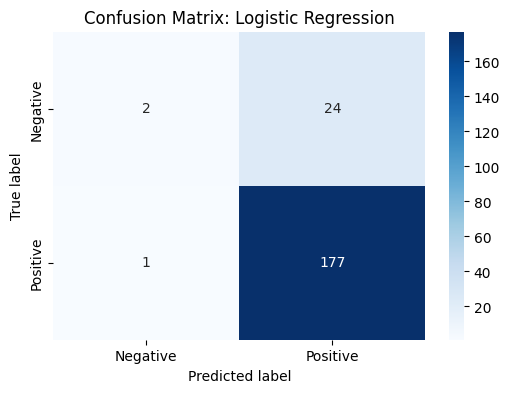


Model: SVM
Accuracy: 0.9510
Precision: 0.9468
Recall: 1.0000
F1-Score: 0.9727


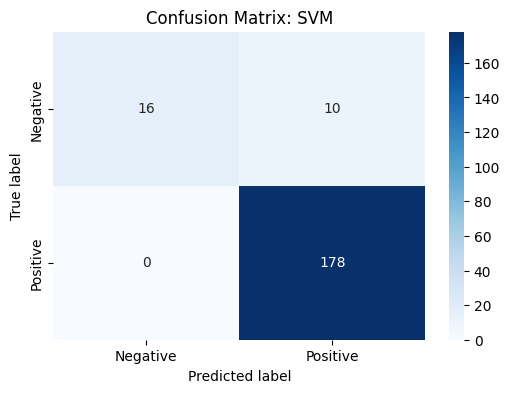


Model: Random Forest
Accuracy: 0.9559
Precision: 0.9519
Recall: 1.0000
F1-Score: 0.9753


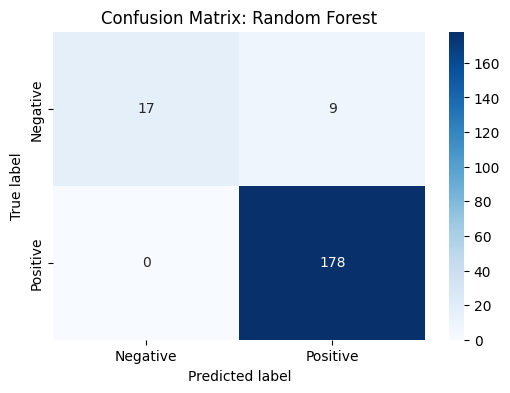


Model: KNN
Accuracy: 0.9216
Precision: 0.9219
Recall: 0.9944
F1-Score: 0.9568


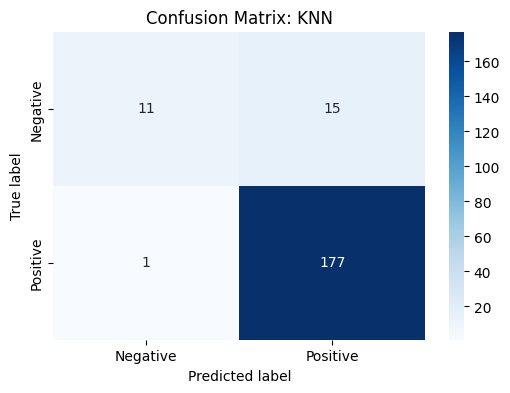


Model: XGBoost
Accuracy: 0.9559
Precision: 0.9519
Recall: 1.0000
F1-Score: 0.9753


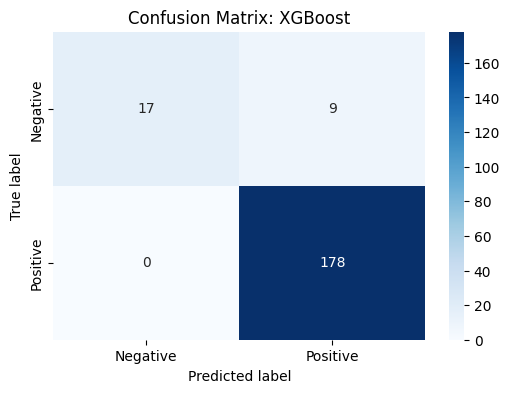


Model: ANN
Accuracy: 0.9510
Precision: 0.9516
Recall: 0.9944
F1-Score: 0.9725


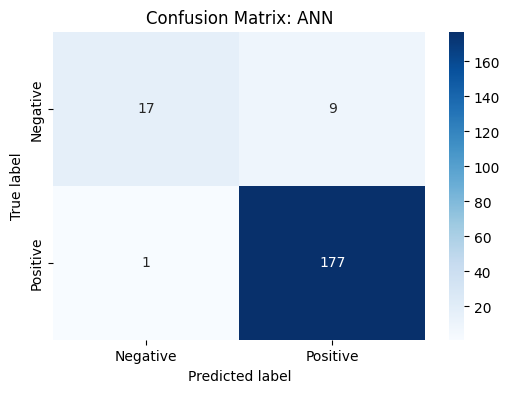

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/fipkart data set2.csv"  # Replace with your file path
data = pd.read_csv('/content/fipkart data set2.csv')

# Convert ratings to binary sentiment (Positive: 4-5, Negative: 1-3)
data['Sentiment'] = data['Rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')

# Drop unnecessary columns
data_cleaned = data[['Review', 'Sentiment']].dropna()

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data_cleaned['Review'])

# Encode the target labels (Sentiment)
encoder = LabelEncoder()
y = encoder.fit_transform(data_cleaned['Sentiment'])

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, conf_matrix

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg_results = evaluate_model(logreg, X_train, X_test, y_train, y_test)

# Support Vector Machine
svm = SVC()
svm_results = evaluate_model(svm, X_train, X_test, y_train, y_test)

# Random Forest
random_forest = RandomForestClassifier()
rf_results = evaluate_model(random_forest, X_train, X_test, y_train, y_test)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn_results = evaluate_model(knn, X_train, X_test, y_train, y_test)

# XGBoost
xgb = XGBClassifier()
xgb_results = evaluate_model(xgb, X_train, X_test, y_train, y_test)

# Artificial Neural Network (ANN)
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
ann_results = evaluate_model(ann, X_train, X_test, y_train, y_test)

# Model Evaluation Summary
models = ['Logistic Regression', 'SVM', 'Random Forest', 'KNN', 'XGBoost', 'ANN']
results = [logreg_results, svm_results, rf_results, knn_results, xgb_results, ann_results]

for i, model in enumerate(models):
    accuracy, precision, recall, f1, conf_matrix = results[i]
    print(f"\nModel: {model}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix: {model}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load and preprocess dataset
file_path = '/content/lipkart data set2.csv'
df = pd.read_csv('/content/lipkart data set2.csv')
df_cleaned = df.drop(columns=['Unnamed: 0'])

tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X = tfidf.fit_transform(df_cleaned['Review']).toarray()
y = df_cleaned['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")


Decision Tree Accuracy: 75.98%


In [ ]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load and preprocess dataset
file_path = '/content/lipkart data set2.csv'
df = pd.read_csv('/content/lipkart data set2.csv')
df_cleaned = df.drop(columns=['Unnamed: 0'])

tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X = tfidf.fit_transform(df_cleaned['Review']).toarray()
y = df_cleaned['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy * 100:.2f}%")


SVM Accuracy: 82.35%


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load and preprocess dataset
file_path = '/content/lipkart data set2.csv'
df = pd.read_csv('/content/lipkart data set2.csv')
df_cleaned = df.drop(columns=['Unnamed: 0'])

tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X = tfidf.fit_transform(df_cleaned['Review']).toarray()
y = df_cleaned['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy * 100:.2f}%")


Naive Bayes Accuracy: 70.59%


In [ ]:
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load and preprocess dataset
file_path = '/content/lipkart data set2.csv'
df = pd.read_csv('/content/lipkart data set2.csv')
df_cleaned = df.drop(columns=['Unnamed: 0'])

tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X = tfidf.fit_transform(df_cleaned['Review']).toarray()
y = df_cleaned['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")


KNN Accuracy: 49.51%


In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = '/content/lipkart data set2.csv'  # Change this path as necessary
df = pd.read_csv('/content/lipkart data set2.csv')

# Dropping unnecessary 'Unnamed: 0' column
df_cleaned = df.drop(columns=['Unnamed: 0'])

# Convert text reviews into TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X = tfidf.fit_transform(df_cleaned['Review']).toarray()
y = df_cleaned['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store model results
model_results = {}

# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
model_results['Logistic Regression'] = accuracy_score(y_test, y_pred_lr)

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
model_results['Random Forest'] = accuracy_score(y_test, y_pred_rf)

# 3. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
model_results['Decision Tree'] = accuracy_score(y_test, y_pred_dt)

# 4. Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
model_results['SVM'] = accuracy_score(y_test, y_pred_svm)

# 5. Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
model_results['Naive Bayes'] = accuracy_score(y_test, y_pred_nb)

# 6. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
model_results['KNN'] = accuracy_score(y_test, y_pred_knn)

# Display the accuracy of each model
print("Accuracy of each model:")
for model, accuracy in model_results.items():
    print(f"{model}: {accuracy * 100:.2f}%")

# Find and print the model with the best accuracy
best_model = max(model_results, key=model_results.get)
best_accuracy = model_results[best_model]
print(f"\nBest Model: {best_model} with accuracy of {best_accuracy * 100:.2f}%")


Accuracy of each model:
Logistic Regression: 77.45%
Random Forest: 85.78%
Decision Tree: 75.98%
SVM: 82.35%
Naive Bayes: 70.59%
KNN: 49.51%

Best Model: Random Forest with accuracy of 85.78%


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Load and preprocess the dataset
flipkart_data = pd.read_csv('/content/fipkart data set2.csv')
flipkart_data_cleaned = flipkart_data.drop(columns=['Unnamed: 0'])

# Convert Ratings to Sentiments: 1-2 as 'Negative', 3 as 'Neutral', 4-5 as 'Positive'
def rating_to_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the function to create the 'Sentiment' column
flipkart_data_cleaned['Sentiment'] = flipkart_data_cleaned['Rating'].apply(rating_to_sentiment)

# Extract features (Reviews) and labels (Sentiment)
X = flipkart_data_cleaned['Review']
y = flipkart_data_cleaned['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict sentiments on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

# Performance Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')
report = classification_report(y_test, y_pred_rf, target_names=['Negative', 'Neutral', 'Positive'])

# Output performance metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("\nClassification Report:\n", report)

# Calculating Sentiment Distribution
sentiment_counts = pd.Series(y_pred_rf).value_counts(normalize=True) * 100
print("\nSentiment Distribution:")
print("Positive: {:.2f}%".format(sentiment_counts.get('Positive', 0)))
print("Neutral: {:.2f}%".format(sentiment_counts.get('Neutral', 0)))
print("Negative: {:.2f}%".format(sentiment_counts.get('Negative', 0)))


Accuracy: 95.59%
Precision: 95.80%
Recall: 95.59%
F1 Score: 94.97%

Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.85      0.92        13
     Neutral       1.00      0.46      0.63        13
    Positive       0.95      1.00      0.98       178

    accuracy                           0.96       204
   macro avg       0.98      0.77      0.84       204
weighted avg       0.96      0.96      0.95       204


Sentiment Distribution:
Positive: 91.67%
Neutral: 2.94%
Negative: 5.39%


Accuracy: 95.59%
Precision: 95.80%
Recall: 95.59%
F1 Score: 94.97%

Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.85      0.92        13
     Neutral       1.00      0.46      0.63        13
    Positive       0.95      1.00      0.98       178

    accuracy                           0.96       204
   macro avg       0.98      0.77      0.84       204
weighted avg       0.96      0.96      0.95       204



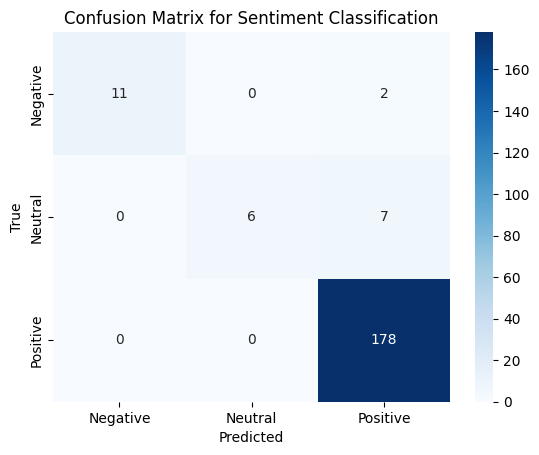


Sentiment Distribution:
Positive: 91.67%
Neutral: 2.94%
Negative: 5.39%


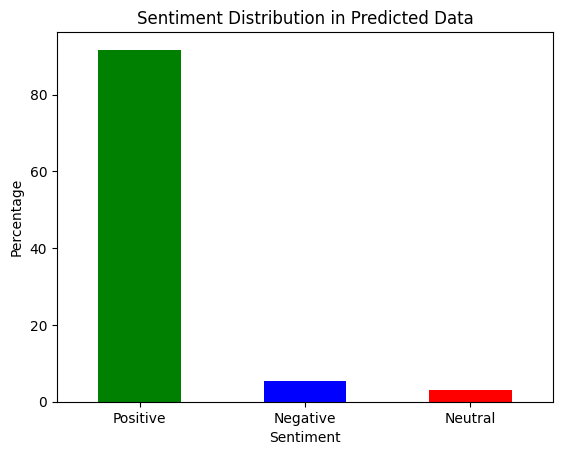

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix

# Load and preprocess the dataset
flipkart_data = pd.read_csv('/content/fipkart data set2.csv')
flipkart_data_cleaned = flipkart_data.drop(columns=['Unnamed: 0'])

# Convert Ratings to Sentiments: 1-2 as 'Negative', 3 as 'Neutral', 4-5 as 'Positive'
def rating_to_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the function to create the 'Sentiment' column
flipkart_data_cleaned['Sentiment'] = flipkart_data_cleaned['Rating'].apply(rating_to_sentiment)

# Extract features (Reviews) and labels (Sentiment)
X = flipkart_data_cleaned['Review']
y = flipkart_data_cleaned['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict sentiments on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

# Performance Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')
report = classification_report(y_test, y_pred_rf, target_names=['Negative', 'Neutral', 'Positive'])

# Output performance metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("\nClassification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix for Sentiment Classification")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculating Sentiment Distribution
sentiment_counts = pd.Series(y_pred_rf).value_counts(normalize=True) * 100
print("\nSentiment Distribution:")
print("Positive: {:.2f}%".format(sentiment_counts.get('Positive', 0)))
print("Neutral: {:.2f}%".format(sentiment_counts.get('Neutral', 0)))
print("Negative: {:.2f}%".format(sentiment_counts.get('Negative', 0)))

# Bar plot for Sentiment Distribution
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title("Sentiment Distribution in Predicted Data")
plt.xlabel("Sentiment")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()


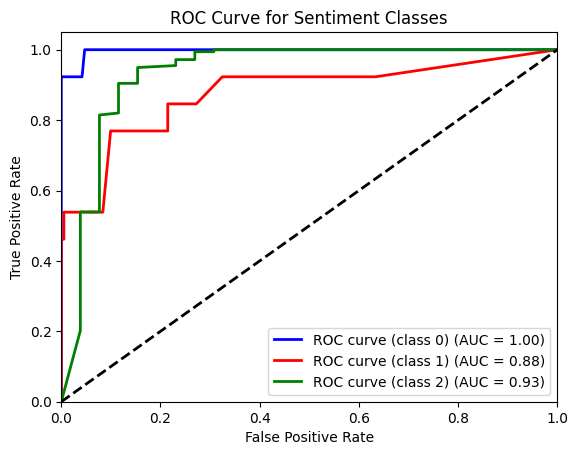

Overall AUC Score: 0.93


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import seaborn as sns

# Load and preprocess the dataset
flipkart_data = pd.read_csv('/content/fipkart data set2.csv')
flipkart_data_cleaned = flipkart_data.drop(columns=['Unnamed: 0'])

# Convert Ratings to Sentiments: 1-2 as 'Negative', 3 as 'Neutral', 4-5 as 'Positive'
def rating_to_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the function to create the 'Sentiment' column
flipkart_data_cleaned['Sentiment'] = flipkart_data_cleaned['Rating'].apply(rating_to_sentiment)

# Extract features (Reviews) and labels (Sentiment)
X = flipkart_data_cleaned['Review']
y = flipkart_data_cleaned['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Binarize the output for multiclass ROC
y_binarized = label_binarize(y_test, classes=['Negative', 'Neutral', 'Positive']) # Binarize the test labels
n_classes = y_binarized.shape[1]

# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict probabilities for the test set for ROC
y_score = rf_model.predict_proba(X_test_tfidf)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i, color in zip(range(n_classes), ['blue', 'red', 'green']):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Sentiment Classes')
plt.legend(loc="lower right")
plt.show()

# Calculate overall AUC score (weighted average of each class)
overall_auc = roc_auc_score(y_binarized, y_score, average="weighted")
print(f"Overall AUC Score: {overall_auc:.2f}")

# Box Plot for Sentiment Classes
sentiment_features = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf.get_feature_names_out()) # Use the correct variable name 'tfidf'